## 🛑 Complete los siguientes datos 

- Nombre y Apellidos: Haizea Rodriguez
- Entrega: 01 - Fuzzy Logic
- Fecha: 08/10/2021
- Tiempo dedicado a la entrega: 5/6 h
- Principales dudas y dificultades encontrados en el desarrollo:

Dificultad de aproximarme más a valores como 100 en la clasificación, a pesar de probar con distintas variables no lograba obtener mayores de 80 ni menores de 16 


#Instrucciones Generales

**Laboratorio de IA**

**Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correpondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica. 

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código). 

Consideraciones generales sobre el código:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario. 


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación:**  Esta práctica cuenta un 12.5% de la evaluación final de la asignatura.

En las indicaciones, hay instrucciones extra indicadas con el símbolo 🤖. No son requisitos para superar la práctica, sino acciones que puedes realizar para mejorar la calificación.

La calificación de los ejercicios se hará con los siguientes criterios:
- [9 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras (🤖) que avalan su excelencia.
- [7 a 9] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 7] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

En las próximas celdas, tendrá que desarrollar un Sistema Basado en Lógica Difusa capaz de dar una valoración entre 0 y 100 de los jugadores de baloncesto 
a partir de las características del fichero de datos que puede encontrar en el directorio Drive de materiales. 

Fuente de los datos: https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues

**Requisitos básicos**
 - Utilizar al menos 2 de las variables y codificar cada una de ellas con al menos 3 conjuntos difusos.
 - Incluir al menos 5 reglas difusas.

**Consideraciones deseables**
 - Dado que hay datos de diferentes temporadas, deberá filtrar los datos y quedarse con aquellos de la última temporada, para evitar tener jugadores repetidos. 
 - Es deseable el sistema sea capaz de asignar una valoración cercana a 0 (en el caso del peor jugador), así como cercana a 100 (en el caso del mejor jugador).
 - También es deseable que no existan muchos jugadores con puntuación similar.

**🤖Requisitos extra**
 - Utilizar 3 o más variables de entrada, codificando cada una de ellas con al menos 3 conjuntos difusos (más de 12 reglas).
 - Incluir tantas reglas como sean necesarias para asegurar que la base de reglas es completa (cualquier combinación valor de entrada produce una salida).
 - Busque documentación y razone la respuesta a lo siguiente: Si quisiéramos hacer un sistema, no que valorara a los jugadores, si no que, recibiendo datos de un jugador, clasifique éste en la posición idónea (Base, Alero, Pivot). ¿Cómo podría implementarse?
   - Pista: en este caso, se suele hablar de Sistema de Clasificación basado en Lógica Difusa, y la principal diferencia es que la salida del mismo es una categoría, en lugar de un número o *puntuación*.


Instalación del paquete necesario

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=31f7c0cd5b25acd6e372f9f8dd653ba0ba9b7fde14cf3cccb807cd57631022f7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Lectura del CSV y comprensión de los datos 

In [ ]:
# Lectura del file desde Github para no tener que cargar constantemente el fichero 
# Se pasa el url del lugar dónde está guardado el csv y se carga 
urlDatos = "https://raw.githubusercontent.com/HaizeaR/Sistemas-Inteligentes/main/Data/Datos%20pr%C3%A1ctica%2001%20-%20players_stats_by_season_full_details.csv"
datos = pd.read_csv(urlDatos)
display(datos)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,13,3,4,5,27,4,14,18,8,1,3,19,1995.0,Aug,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,14,1,3,3,2,2,4,6,3,0,0,15,1991.0,Oct,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16,124.7,1,15,0,11,7,14,11,12,0,15,15,10,6,1,9,1994.0,Sep,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12,59.2,0,8,0,7,3,6,5,6,1,4,5,3,1,0,3,1993.0,Nov,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN


El siguiente comando muestra la información de las columnas del DF (su tipo)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

In [ ]:
# Con esto verificamos que efectivamente hay valores repetidos y sacamos la cantidad de jugadores 
# únicos. Valor que nos interesa para luego comprobar que hemos eliminado bien las filas que no necesitamos
print("Tenemos "+ str(datos['Player'].count())+" entradas de jugadores")
print("De los cuales únicos solo tenemos " + str(datos['Player'].unique().size))

Tenemos 53949 entradas de jugadores
De los cuales únicos solo tenemos 14582


In [ ]:
datos['Season'].value_counts()
# Nos quedamos con 2019-2020

2019 - 2020    7264
2018 - 2019    5146
2017 - 2018    4820
2016 - 2017    4317
2015 - 2016    4257
2012 - 2013    4038
2013 - 2014    4001
2014 - 2015    3965
2011 - 2012    3823
2007 - 2008    1425
2004 - 2005    1376
2009 - 2010    1304
2008 - 2009    1296
2010 - 2011    1282
2006 - 2007    1227
2005 - 2006    1195
2003 - 2004    1170
2002 - 2003     703
2001 - 2002     520
2000 - 2001     478
1999 - 2000     342
Name: Season, dtype: int64

In [ ]:
temporadas = datos['Season'].unique()
# Con esto quitamos del array la temporada con la que nos queremos quedar. 
# El objetivo es crear un array que podamos utilizar para dropear todas las filas que contengan
# cualquiera de estos valores
temporadas =  np.delete(temporadas,temporadas.size-1, axis=None)
print(temporadas)


['1999 - 2000' '2000 - 2001' '2001 - 2002' '2002 - 2003' '2003 - 2004'
 '2004 - 2005' '2005 - 2006' '2006 - 2007' '2007 - 2008' '2008 - 2009'
 '2009 - 2010' '2010 - 2011' '2011 - 2012' '2012 - 2013' '2013 - 2014'
 '2014 - 2015' '2015 - 2016' '2016 - 2017' '2017 - 2018' '2018 - 2019']


In [ ]:
datos = datos[~datos['Season'].isin(temporadas)]
datos.reset_index(inplace=True, drop=True)

In [ ]:
datos['Season'].value_counts()
# Con este comando verificamos que la eliminación es correcta y solo tenemos datos de la última temporada 

2019 - 2020    7264
Name: Season, dtype: int64

In [ ]:
print("Tenemos "+ str(datos['Player'].count())+" entradas de jugadores")
print("De los cuales únicos solo tenemos " + str(datos['Player'].unique().size))
#Se siguen repitiendo varios valores 

Tenemos 7264 entradas de jugadores
De los cuales únicos solo tenemos 6304


In [ ]:
datos.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg,draft_round,draft_pick
count,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7125.000000,7228.000000,6096.000000,6096.000000,666.000000,666.000000
mean,21.354901,462.713175,70.490363,153.009224,20.606415,58.839620,32.911206,44.501652,28.715033,44.467786,20.765419,57.293915,78.059334,41.936812,16.253166,6.000826,194.523541,1992.585684,196.575678,205.190125,93.103346,1.442943,15.036036
std,11.263403,337.346909,67.350672,140.650193,24.217746,63.702436,38.116978,48.292354,24.442269,29.089834,22.275985,56.776376,75.878425,49.124868,14.366763,10.383796,186.335816,4.692165,8.649419,24.870344,11.282857,0.497107,8.756620
min,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,165.000000,130.000000,59.000000,1.000000,1.000000
25%,14.000000,244.000000,28.000000,67.000000,4.000000,16.000000,10.000000,15.000000,13.000000,25.000000,7.000000,23.000000,32.000000,13.000000,7.000000,1.000000,79.000000,1989.000000,191.000000,187.000000,85.000000,1.000000,7.000000
50%,20.000000,398.250000,55.000000,122.000000,14.000000,43.000000,23.000000,32.000000,23.000000,39.000000,14.000000,43.000000,58.000000,27.500000,13.000000,3.000000,153.000000,1993.000000,198.000000,202.000000,92.000000,1.000000,14.000000
75%,25.000000,580.925000,91.000000,193.000000,29.000000,80.000000,43.000000,58.000000,38.000000,56.000000,27.000000,72.000000,99.000000,53.000000,22.000000,7.000000,249.000000,1996.000000,203.000000,220.000000,100.000000,2.000000,23.000000
max,74.000000,2556.400000,685.000000,1514.000000,299.000000,843.000000,692.000000,800.000000,308.000000,278.000000,258.000000,716.000000,916.000000,684.000000,132.000000,196.000000,2335.000000,2004.000000,229.000000,304.000000,138.000000,2.000000,30.000000


Entendiendo las varibles: 
(Sacado de la wikipedia) 

- ***GP:*** games played
- ***MIN:*** minutes
- ***FGM, FGA, FG%:*** field goals made, attempted and percentage
- ***3FGM, 3FGA, 3FG%:*** three-point field goals made, attempted and percentage
- ***FTM, FTA, FT%:*** free throws made, attempted and percentage
- ***TO:*** turnovers
- ***PF:*** personal fouls
- ***REB, OREB, DREB:*** rebounds, offensive rebounds, defensive rebounds
- ***AST:*** assists
- ***STL:*** steals
- ***BLK:*** blocks
- ***PTS:*** points


Definición de las variables de entrada / salida.

In [ ]:
datos['MIN_Partido'] = (datos['MIN'] / datos['GP'])

In [ ]:
datos['MIN_Partido'].describe()

count    7264.000000
mean       21.107799
std         7.932266
min         1.083333
25%        15.382269
50%        21.663782
75%        27.079211
max        41.125000
Name: MIN_Partido, dtype: float64

In [ ]:
# Con esto sacamos el % de acierto de FG
datos['FG%'] = (datos['FGM'] / datos['FGA'])*100

In [ ]:
datos['FG%'].describe()

count    7264.000000
mean       44.876349
std         9.479301
min         0.000000
25%        39.200000
50%        44.512966
75%        50.277546
max       100.000000
Name: FG%, dtype: float64

In [ ]:
tiros = ctrl.Antecedent(np.arange(0,685,1), 'FGM')
min_partido = ctrl.Antecedent(np.arange(0,42,1), 'MIN_Partido')
calidad = ctrl.Consequent(np.arange(0,101,1), 'calidad')


In [ ]:
# Escriba aquí su código (cree celdas adicionales de texto/código si considera que queda así mejor explicado y más claro todo)

Creación de los conjuntos difusos para cada variable

    

In [ ]:
#tiros.automf(3,names = ['low', 'medium', 'high'])
min_partido.automf(3, names = ['low', 'medium', 'high'])

tiros['low'] = fuzz.trimf(tiros.universe, [0, 0, 40])
tiros['medium'] = fuzz.trimf(tiros.universe, [0, 40, 100])
tiros['high'] = fuzz.trimf(tiros.universe, [100, 685, 685])


calidad.automf(3, names = ['low', 'medium', 'high'])

In [ ]:
# Escriba aquí su código (cree celdas adicionales de texto/código si considera que queda así mejor explicado y más claro todo)

Dibujo de los conjuntos difusos generados

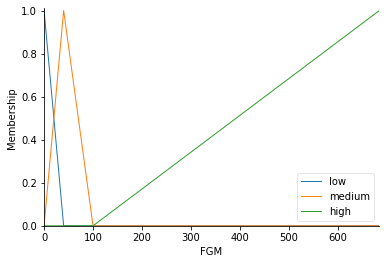

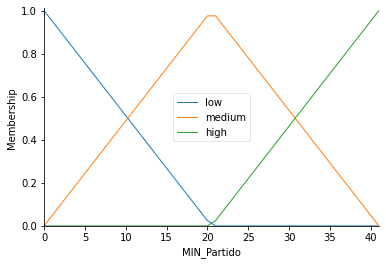

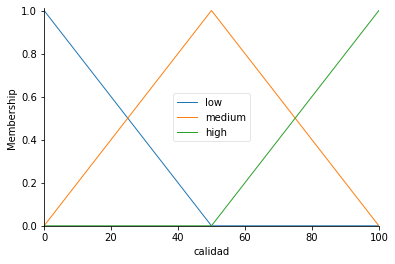

In [ ]:
%matplotlib inline
tiros.view()
min_partido.view()

calidad.view()

Definición de la base de reglas

Definición de reglas con palabras: 
- Si la cantidad de tiros es alta o juega muchos minutos en los partidos podemos decir que es un jugador de alta calidad
- Si la cantidad de tiros es media, el jugador es de calidad media
- Si la cantidad de tiros es baja y juega poco, la calidad es baja 
- Si la cantidad de tiros es muy alta y los minutos que juega por partido son pocos, es de calidad media
- Si la cantidad de tiros es alta y juega un tiempo medium en los partidos, el jugador tiene una alta calidad. 


In [ ]:
rule1 = ctrl.Rule(tiros['high'] | min_partido['high'] , calidad['high'])
rule2 = ctrl.Rule(tiros['medium']                 , calidad['medium'])
rule3 = ctrl.Rule(tiros['low'] | min_partido['low']  , calidad['low'])
rule4 = ctrl.Rule(tiros['high'] & min_partido['low'] , calidad['medium'])
rule5 = ctrl.Rule(tiros['high'] & min_partido['medium'], calidad['high'])



Realización de prueba con un único elemento y mostrar el resultado y visualizar la salida

In [ ]:
quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
quality = ctrl.ControlSystemSimulation(quality_ctrl)

In [ ]:
quality.input['FGM']  = 80
quality.input['MIN_Partido'] = 40

quality.compute()

In [ ]:
quality.output['calidad']

63.282245928729054

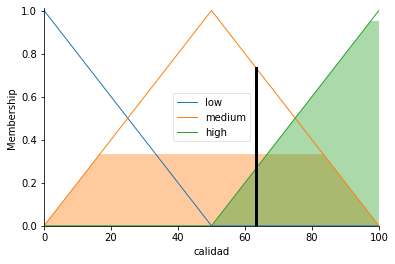

In [ ]:
calidad.view(sim=quality)

Cargar los datos de entrada, filtrar y quedarse únicamente con datos de la última temporada y generar una columna vacía para almacenar el resultado de salida que va a dar nuestro sistema

In [ ]:
# Escriba aquí su código (cree celdas adicionales de texto/código si considera que queda así mejor explicado y más claro todo)

Crear un bucle para la ejecución sobre todas las filas del conjunto de datos

In [ ]:
datos['calidad'] = ""
for i in range(datos.shape[0]):
  quality.input['FGM'] = datos['FGM'][i]
  quality.input['MIN_Partido'] = datos['MIN_Partido'][i]
  quality.compute()
  datos['calidad'][i] = quality.output['calidad']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mostrar el conjunto de datos resultante (únicamente las primeras filas)

In [ ]:
datos_ordenado = datos.sort_values('calidad', ascending = False)
datos_ordenado

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,MIN_Partido,FG%,calidad
5014,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,293,398,629,230,195,140,716,856,354,61,66,1857,1994.0,Dec,"Dec 6, 1994",6-11,211.0,242.0,110.0,Greece / Nigeria,NaN,1.0,15.0,Milwaukee Bucks,30.426984,55.331179,83.3333
5296,NBA,2019 - 2020,Playoffs,Jayson Tatum,BOS,17,690.3,145,334,47,126,100,123,48,41,22,148,170,85,17,20,437,1998.0,Mar,"Mar 3, 1998",6-8,203.0,208.0,94.0,United States,Chaminade College Preparatory School,1.0,3.0,Boston Celtics,40.605882,43.413174,83.3273
1236,Canadian-NBL,2019 - 2020,International,Akeem Ellis,KW,22,893.0,133,316,46,136,77,118,50,66,29,133,162,89,15,5,389,1990.0,Aug,"Aug 4, 1990",6-6,198.0,210.0,95.0,United States,John Jay High School,NaN,NaN,NaN,40.590909,42.088608,83.3268
5011,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,843,692,800,308,227,70,376,446,512,125,60,2335,1989.0,Aug,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School,1.0,3.0,Oklahoma City Thunder,36.508824,44.385733,83.3253
1314,Chinese-CBA,2019 - 2020,International,Joe Young,TONG,44,1782.0,617,1220,139,381,314,353,173,68,37,168,205,280,101,0,1687,1992.0,Jun,"Jun 27, 1992",6-2,188.0,185.0,84.0,United States,Yates High School,2.0,13.0,Indiana Pacers,40.500000,50.573770,83.3237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Czech-NBL,2019 - 2020,International,Marek Vyroubal,PRA,10,28.4,0,3,0,0,2,2,3,4,0,5,5,1,2,0,2,2001.0,Apr,"Apr 2, 2001",6-5,196.0,NaN,NaN,Czech Republic,NaN,NaN,NaN,NaN,2.840000,0.000000,16.6667
3905,Israeli-BSL,2019 - 2020,International,Shalev Shlomo Lugashi,NAH,12,13.0,0,2,0,2,0,0,0,3,0,1,1,0,0,0,0,2001.0,Sep,"Sep 24, 2001",6-4,193.0,NaN,NaN,Israel,NaN,NaN,NaN,NaN,1.083333,0.000000,16.6667
3760,Hungarian-NBIA,2019 - 2020,International,Csaba Kucsora,OSE,10,29.0,0,1,0,0,2,2,0,3,0,4,4,2,0,0,2,1998.0,Feb,"Feb 3, 1998",6-3,191.0,180.0,82.0,Hungary,NaN,NaN,NaN,NaN,2.900000,0.000000,16.6667
6976,Swiss-LNA,2019 - 2020,International,Dusko Lukic,LUG,10,31.0,0,3,0,1,0,2,0,3,0,0,0,2,0,0,0,1998.0,Feb,"Feb 10, 1998",6-1,185.0,175.0,79.0,Switzerland,NaN,NaN,NaN,NaN,3.100000,0.000000,16.6667


Para la columna de salida, muestre por pantalla los valores:
- mínimo, máximo y percentiles 10, 20, 30, 40, ... 90.